In [1]:
import glob
import matplotlib.pyplot as plt
from model.utils import get_yaml_config
import numpy as np

from pprint import pprint
import pickle as pkl

In [2]:
filenames = glob.glob('experiments/search/*/*.yaml')

In [3]:
all_configs = []

f1s = []
aver_prs = []
roc_aucs = []

for filename in filenames:
    config = get_yaml_config(filename)
    all_configs.append(config)
    params_ = dict(
        features=str(config['features']), 
        encoder=str(config['encoder']), 
        aggregation=str(config['aggregation'])
    )
    
    f1s.append((np.round(float(config['f1']), 5), params_))
    aver_prs.append((np.round(float(config['aver_pr']), 5), params_))
    roc_aucs.append((np.round(float(config['roc_auc']), 5), params_))

/notebook/home/i.fursov/fraud_detection/model/utils.py:14: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  params = yaml.load(f)


In [8]:
pkl.dump(all_configs, open('all_configs.pkl', 'wb'))

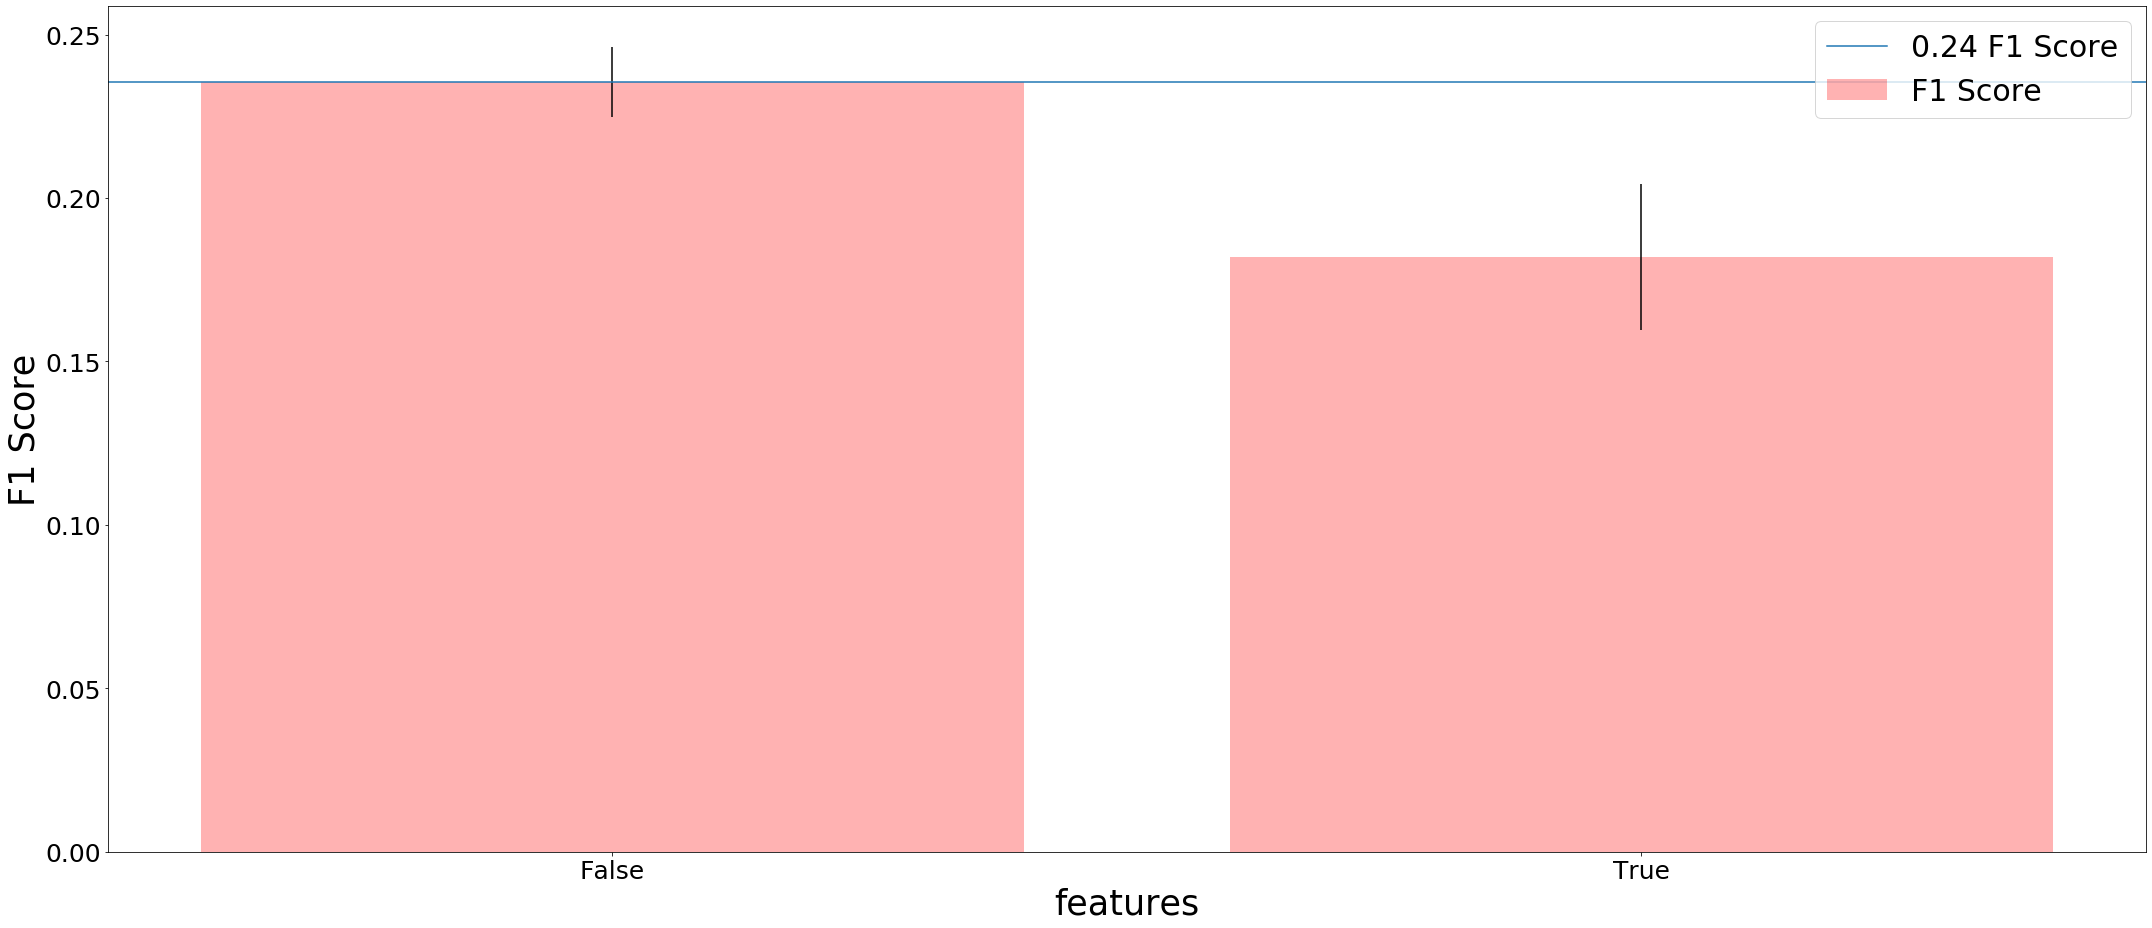

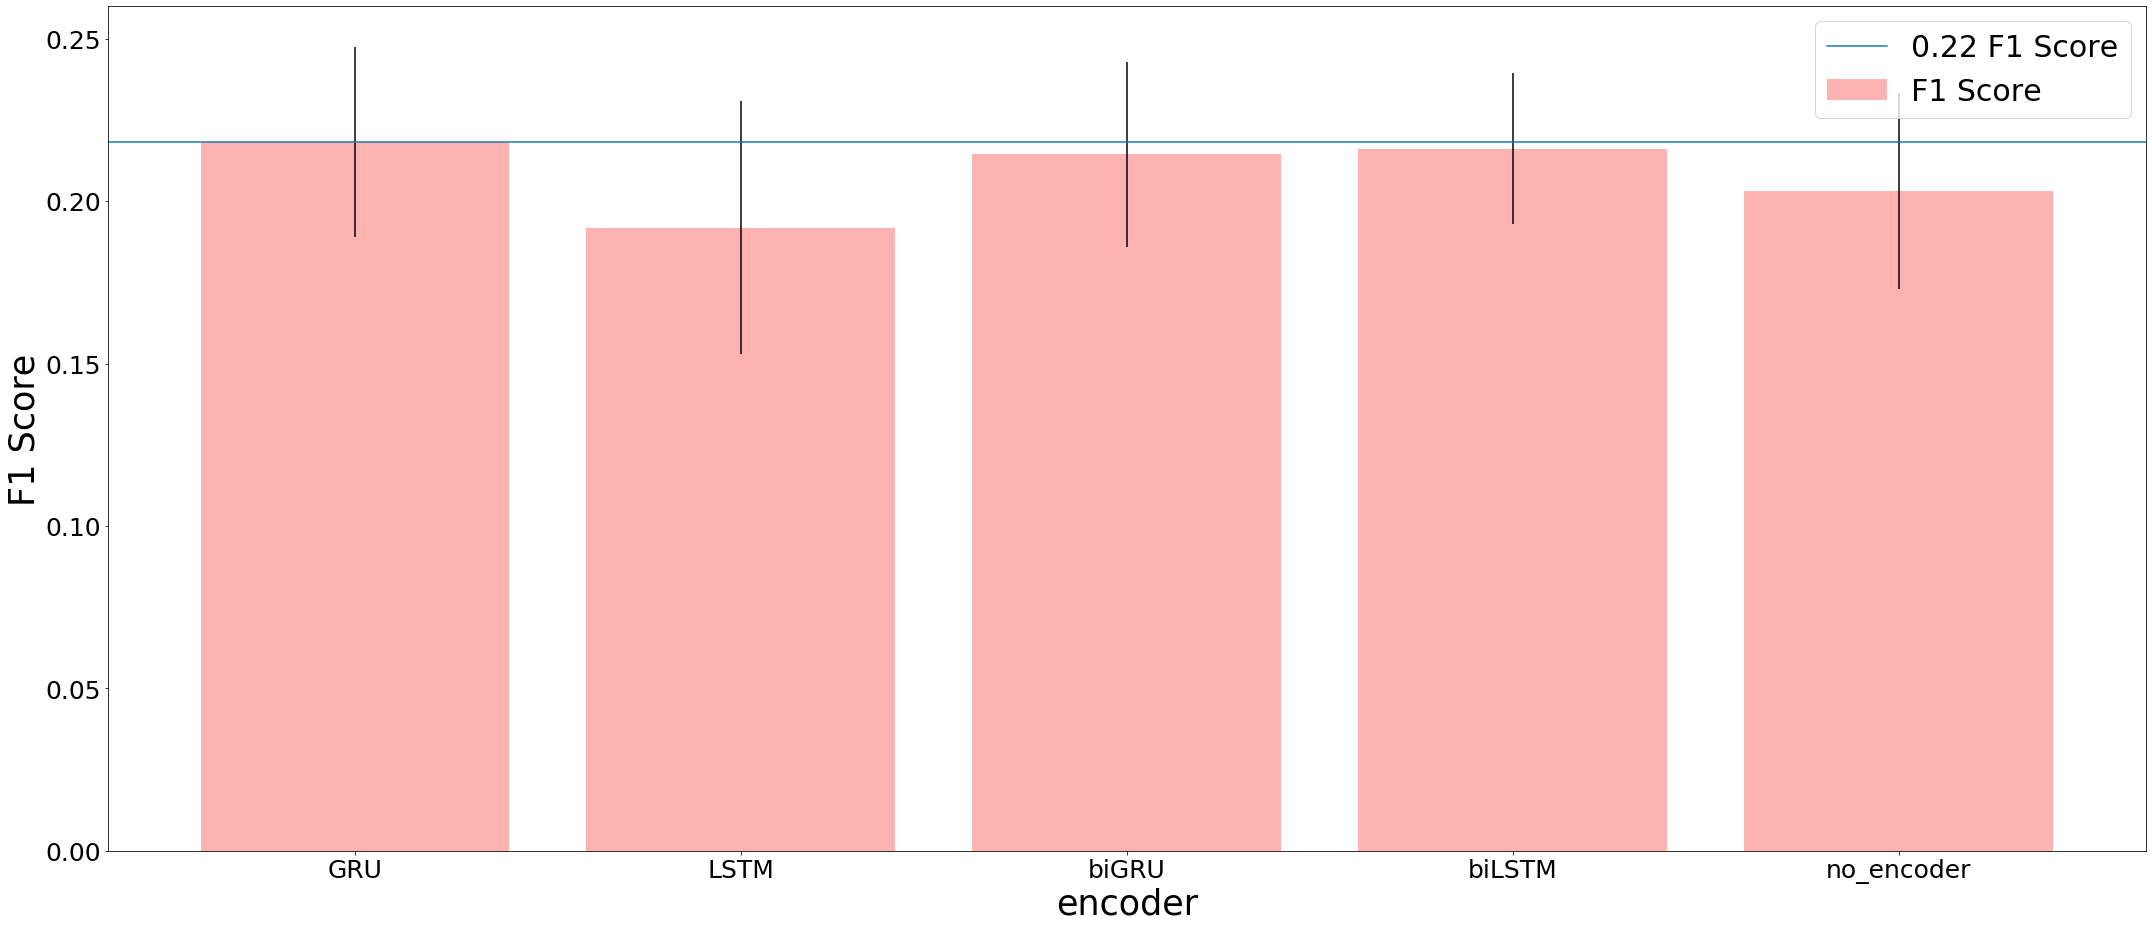

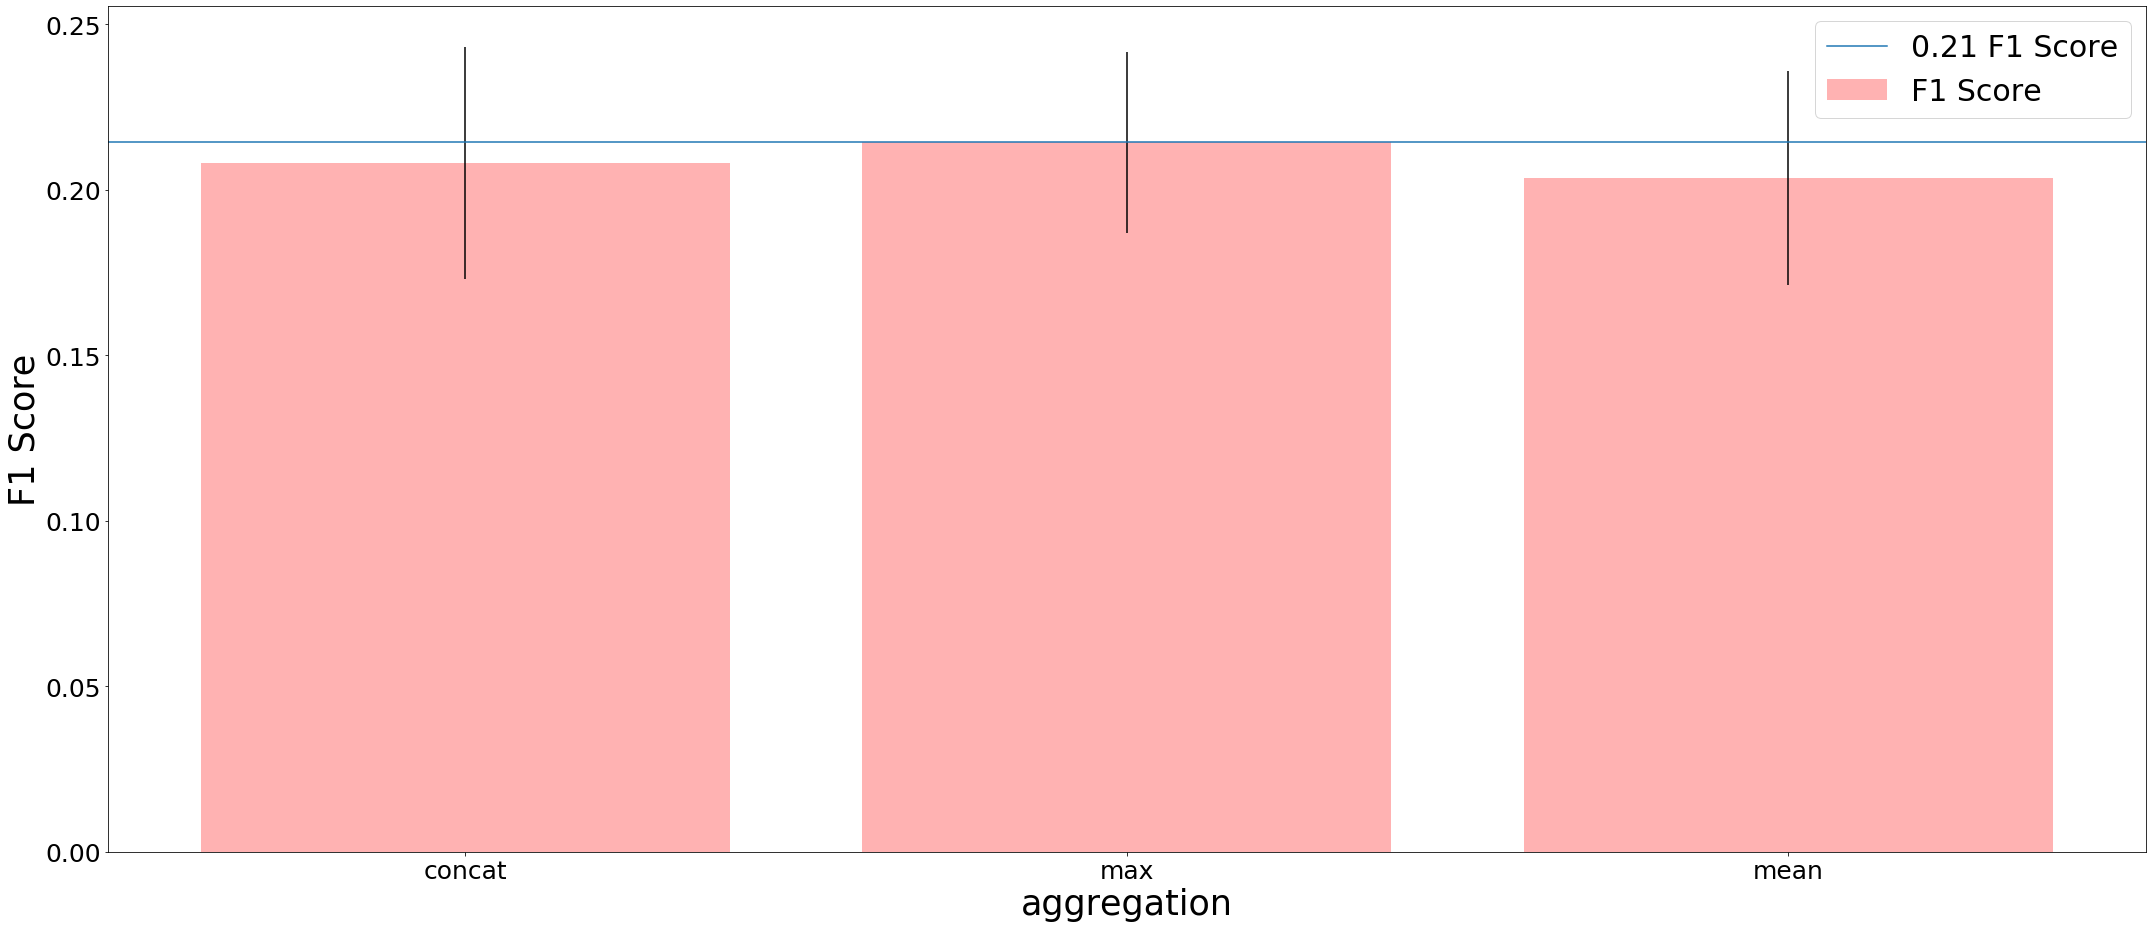

In [4]:
scores = f1s
name = 'F1 Score'

for k in ['features', 'encoder', 'aggregation']:
    mrrs = np.array([a[0] for a in scores])

    hyperparams = np.array([a[1][k] for a in scores])

    unique_values = np.unique(hyperparams)

    curr_scores_mean = []
    curr_scores_std = []

    for val in unique_values:
        cur_vals = mrrs[hyperparams == val]
        mean_value = np.mean(cur_vals)
        std = np.std(cur_vals)

        curr_scores_mean.append(mean_value)
        curr_scores_std.append(std)
    max_val = max(curr_scores_mean)
    
    fig, ax = plt.subplots(figsize=(30, 13))

    rects1 = ax.bar([str(i) for i in unique_values],
                    curr_scores_mean,
                    alpha=0.3,
                    yerr=curr_scores_std,
                    color='red',
                    label=name)


    ax.axhline(y=max_val, label=f'{max_val:.2f} {name}', alpha=1)

    ax.set_xlabel(k, size=35)
    ax.set_ylabel(name, size=35)
    ax.set_xticklabels([str(i) for i in unique_values])
    ax.legend(prop={'size': 30})
    ax.tick_params(labelsize=25)

    fig.tight_layout()
    plt.show()

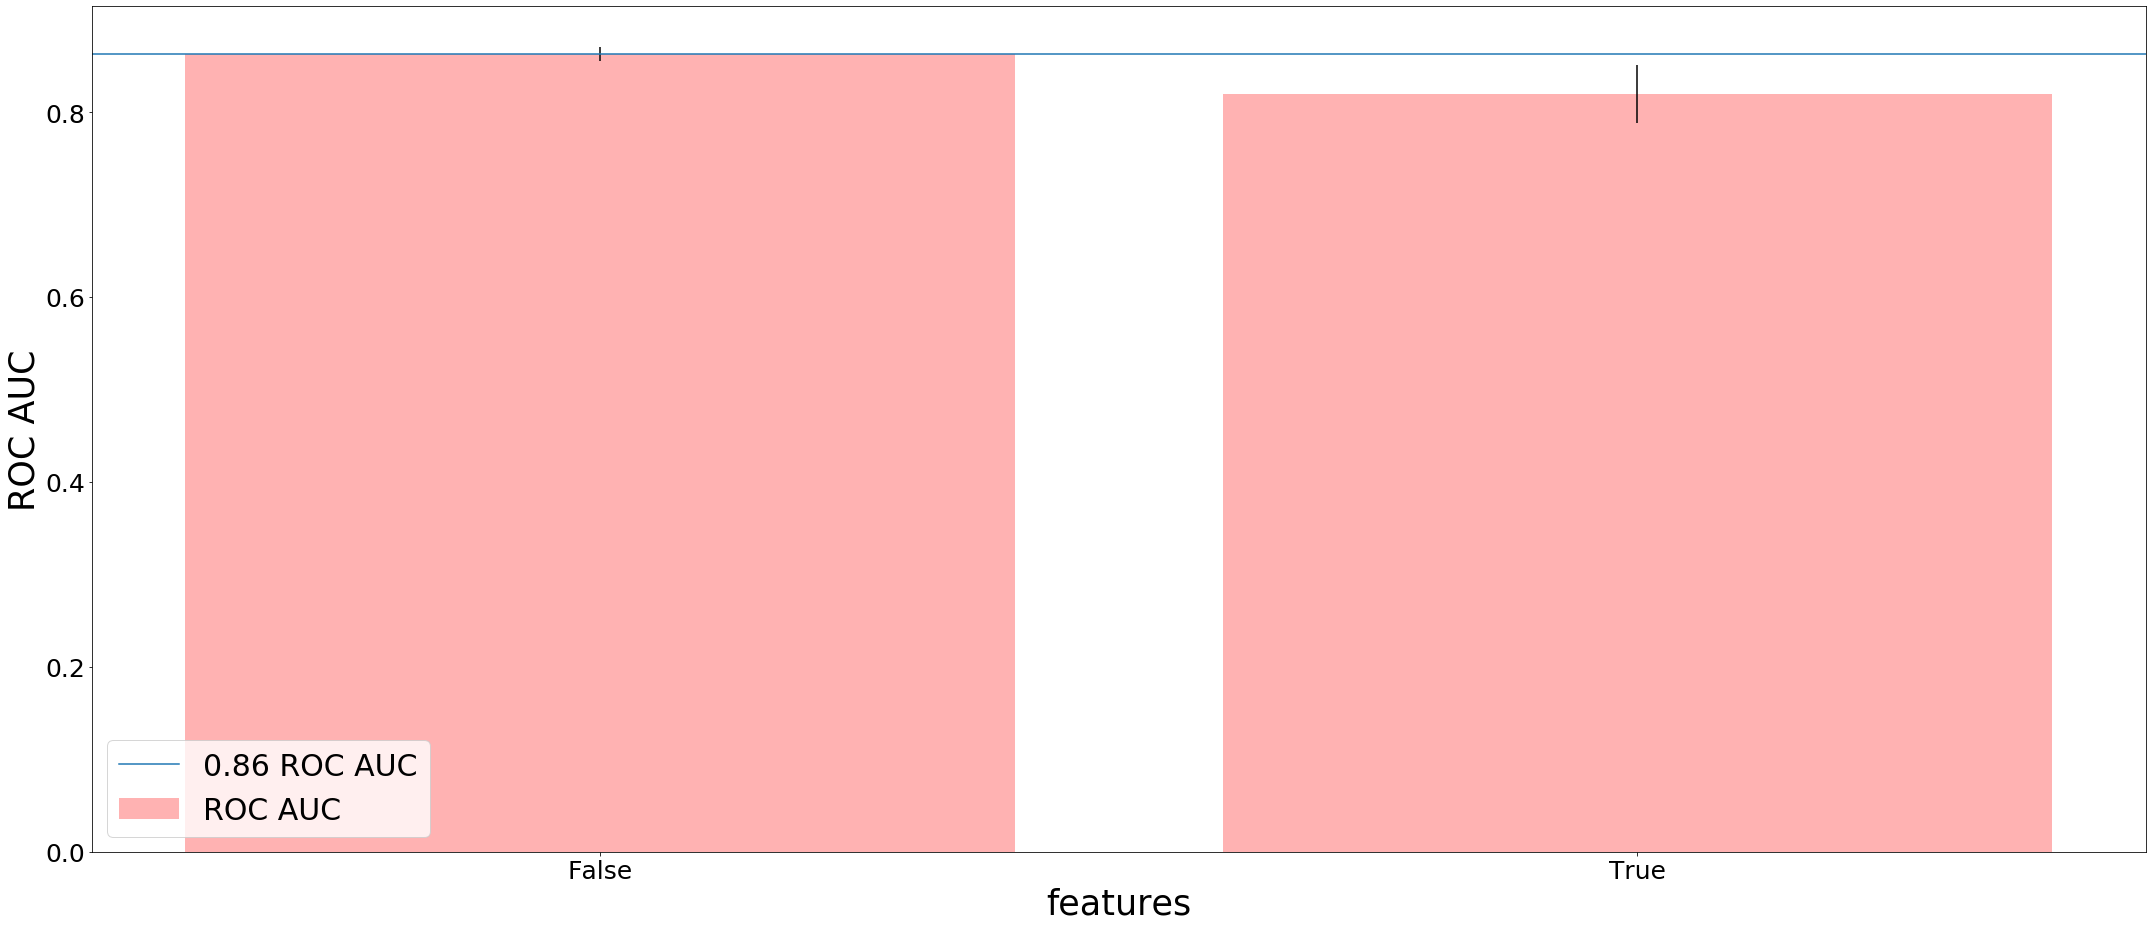

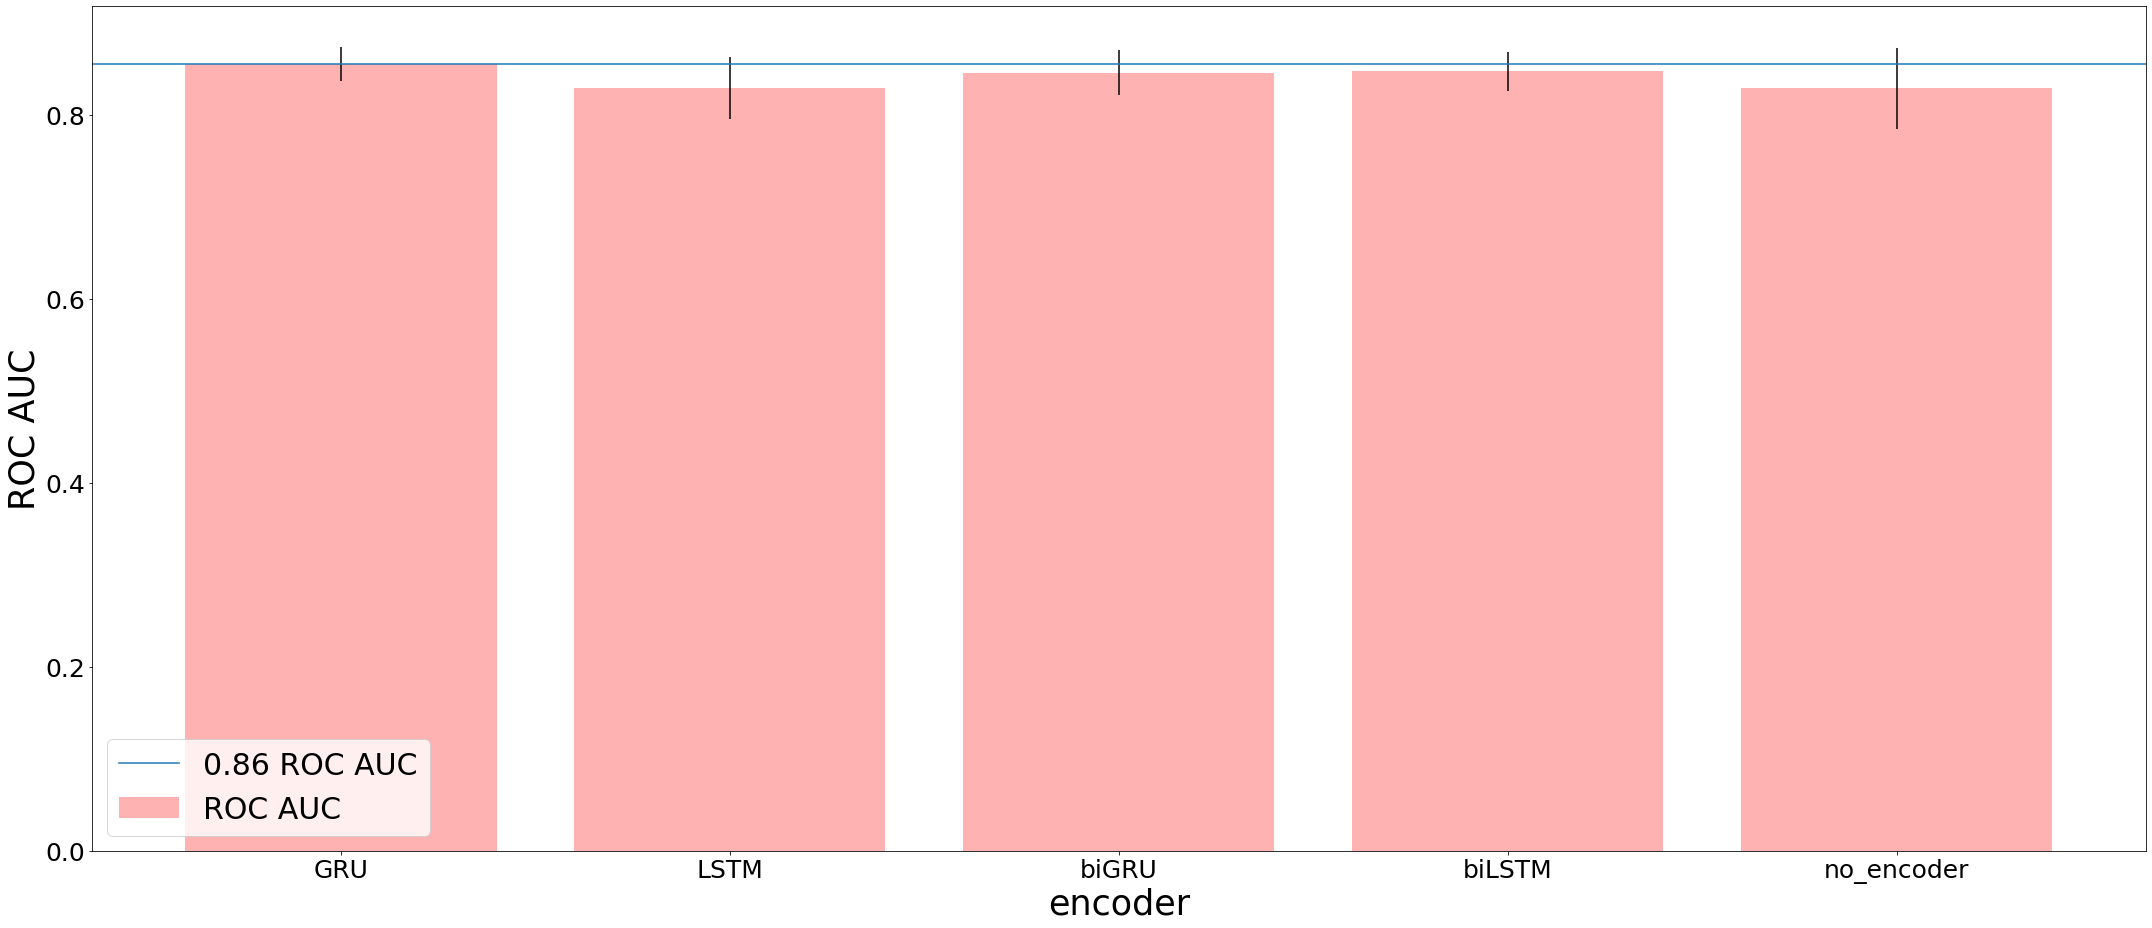

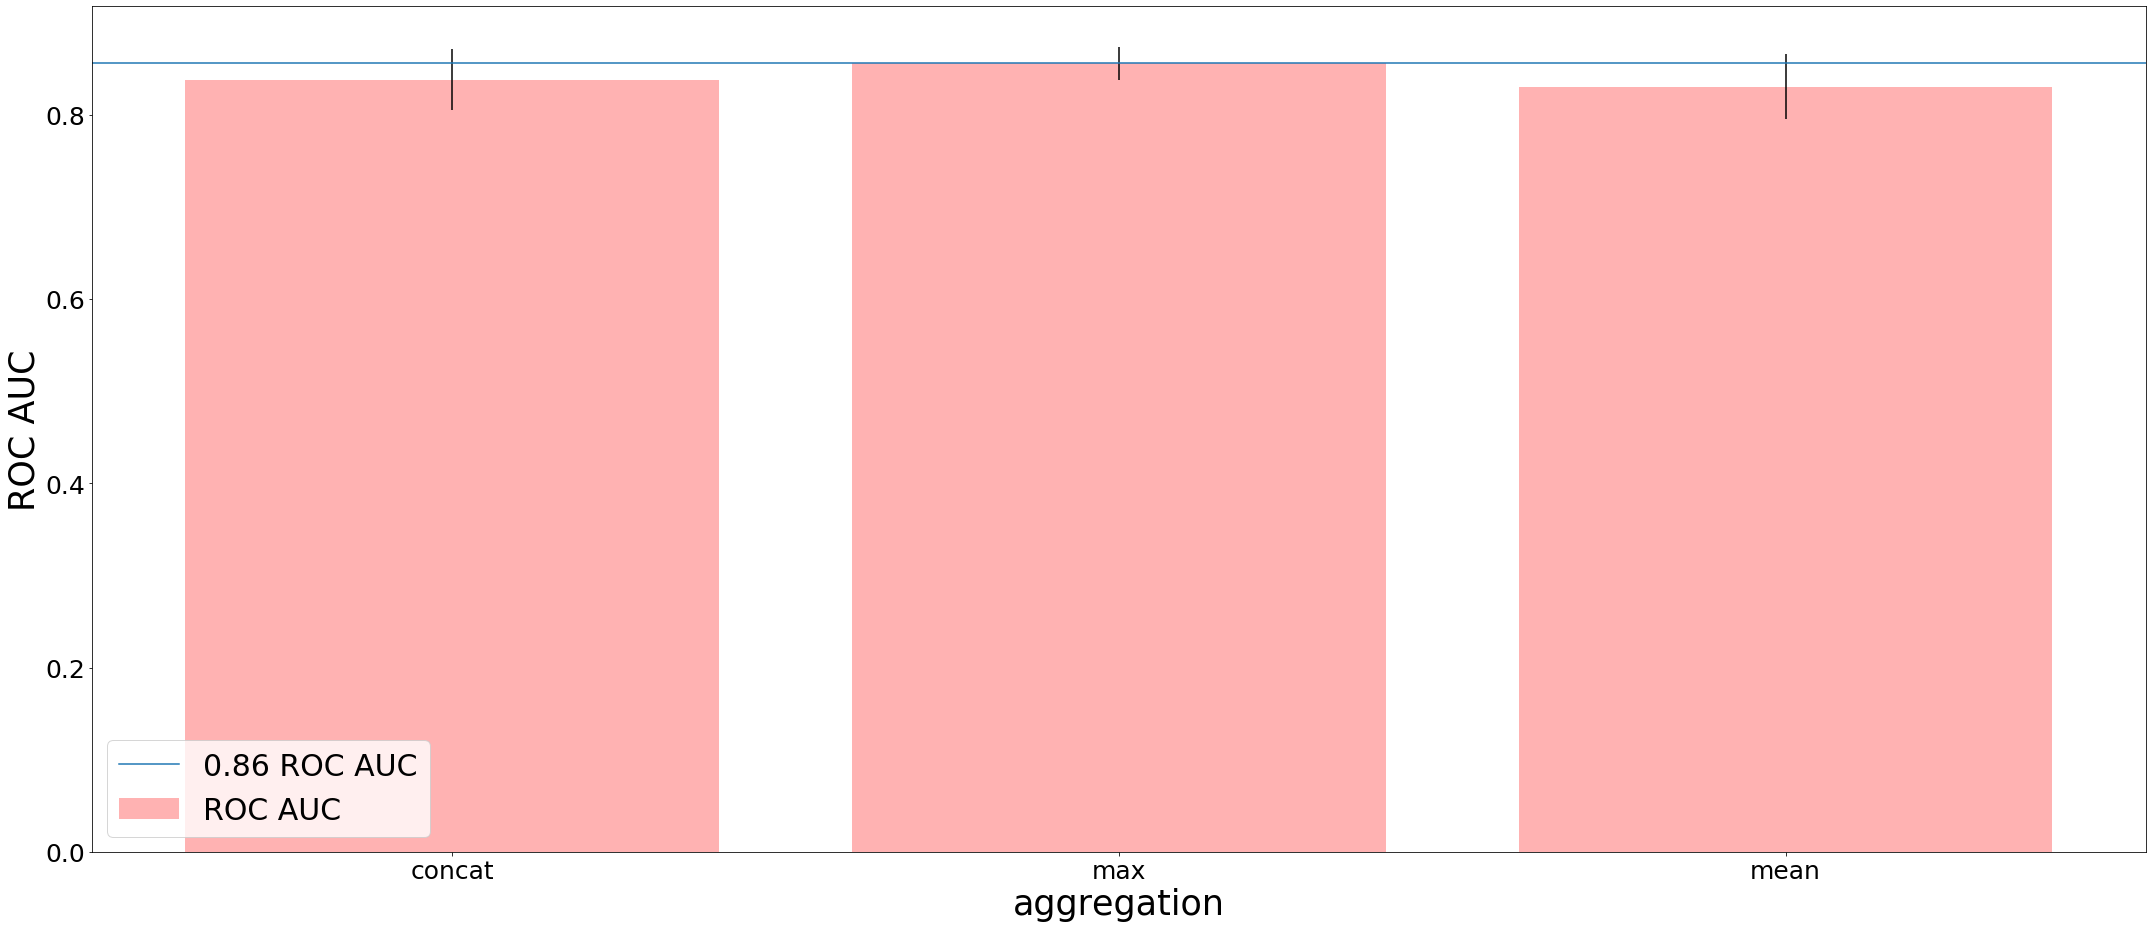

In [5]:
scores = roc_aucs
name = 'ROC AUC'

for k in ['features', 'encoder', 'aggregation']:
    mrrs = np.array([a[0] for a in scores])

    hyperparams = np.array([a[1][k] for a in scores])

    unique_values = np.unique(hyperparams)

    curr_scores_mean = []
    curr_scores_std = []

    for val in unique_values:
        cur_vals = mrrs[hyperparams == val]
        mean_value = np.mean(cur_vals)
        std = np.std(cur_vals)

        curr_scores_mean.append(mean_value)
        curr_scores_std.append(std)
    max_val = max(curr_scores_mean)
    
    fig, ax = plt.subplots(figsize=(30, 13))

    rects1 = ax.bar([str(i) for i in unique_values],
                    curr_scores_mean,
                    alpha=0.3,
                    yerr=curr_scores_std,
                    color='red',
                    label=name)


    ax.axhline(y=max_val, label=f'{max_val:.2f} {name}', alpha=1)

    ax.set_xlabel(k, size=35)
    ax.set_ylabel(name, size=35)
    ax.set_xticklabels([str(i) for i in unique_values])
    ax.legend(prop={'size': 30})
    ax.tick_params(labelsize=25)

    fig.tight_layout()
    plt.show()

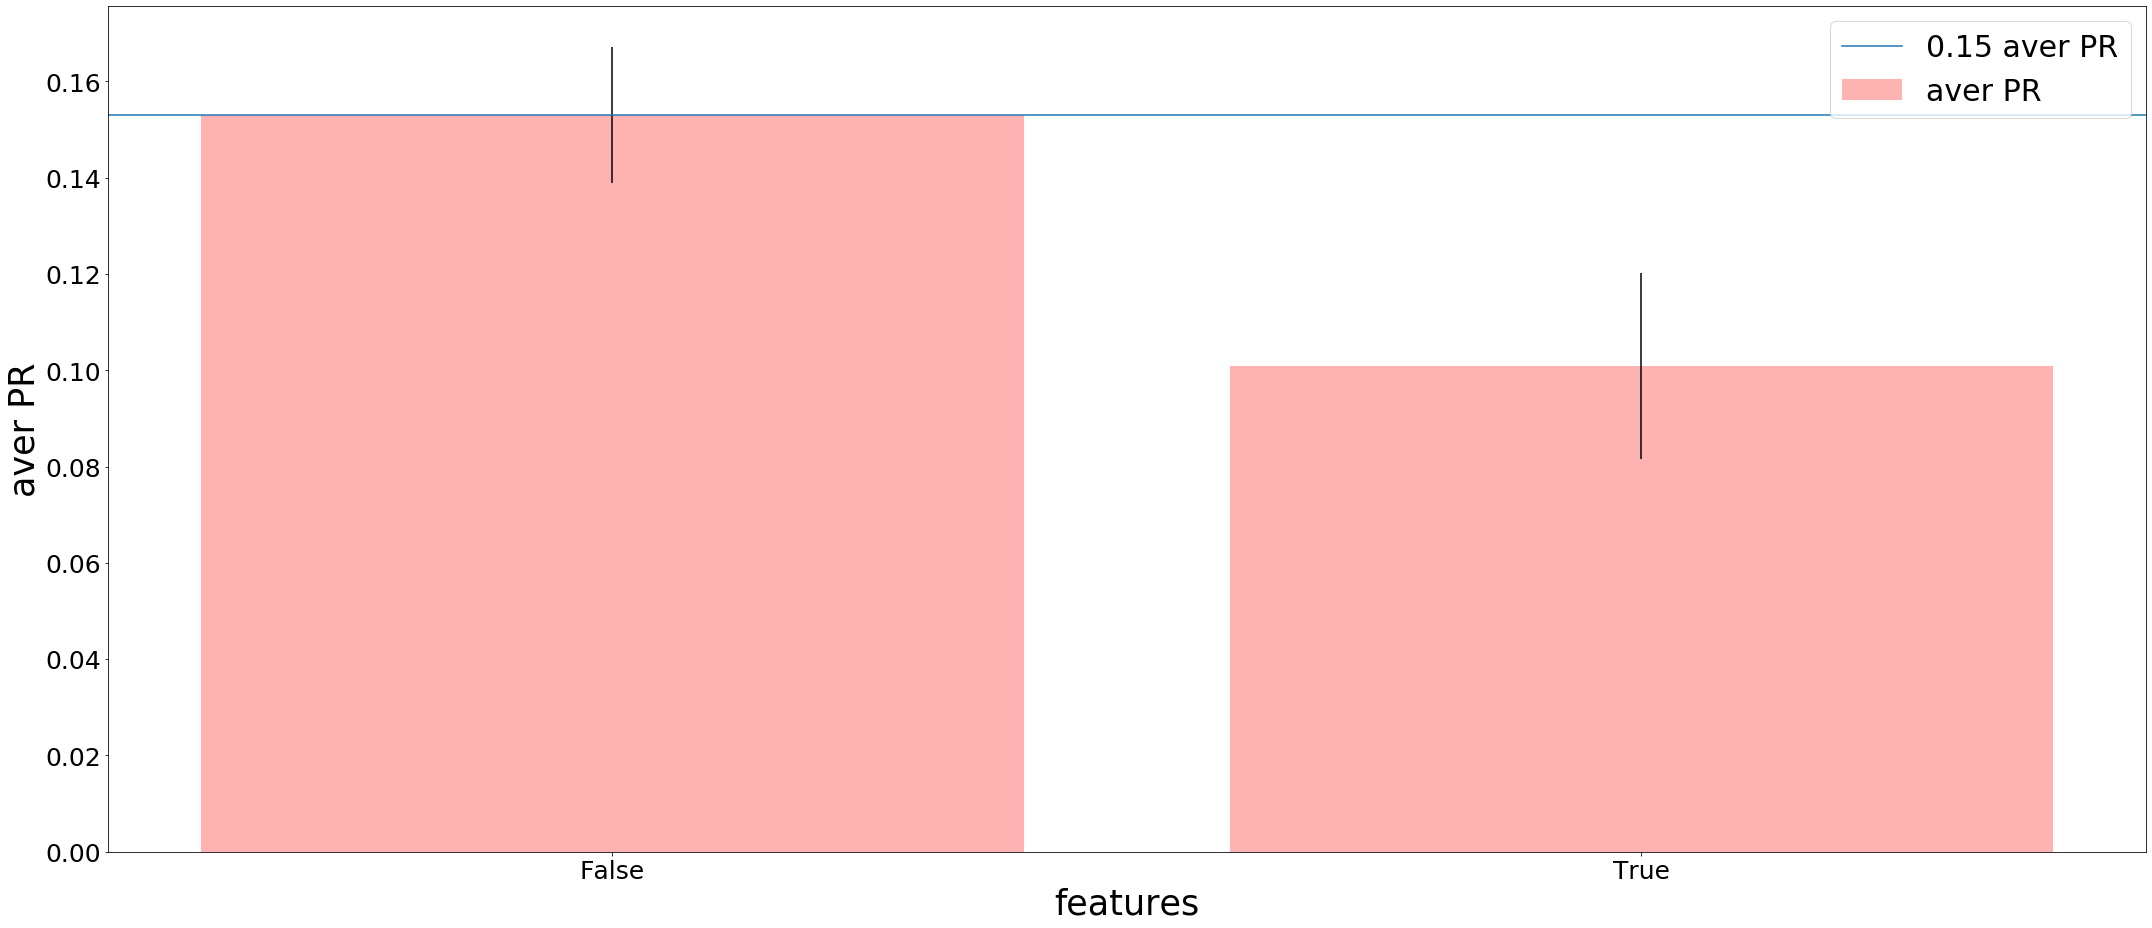

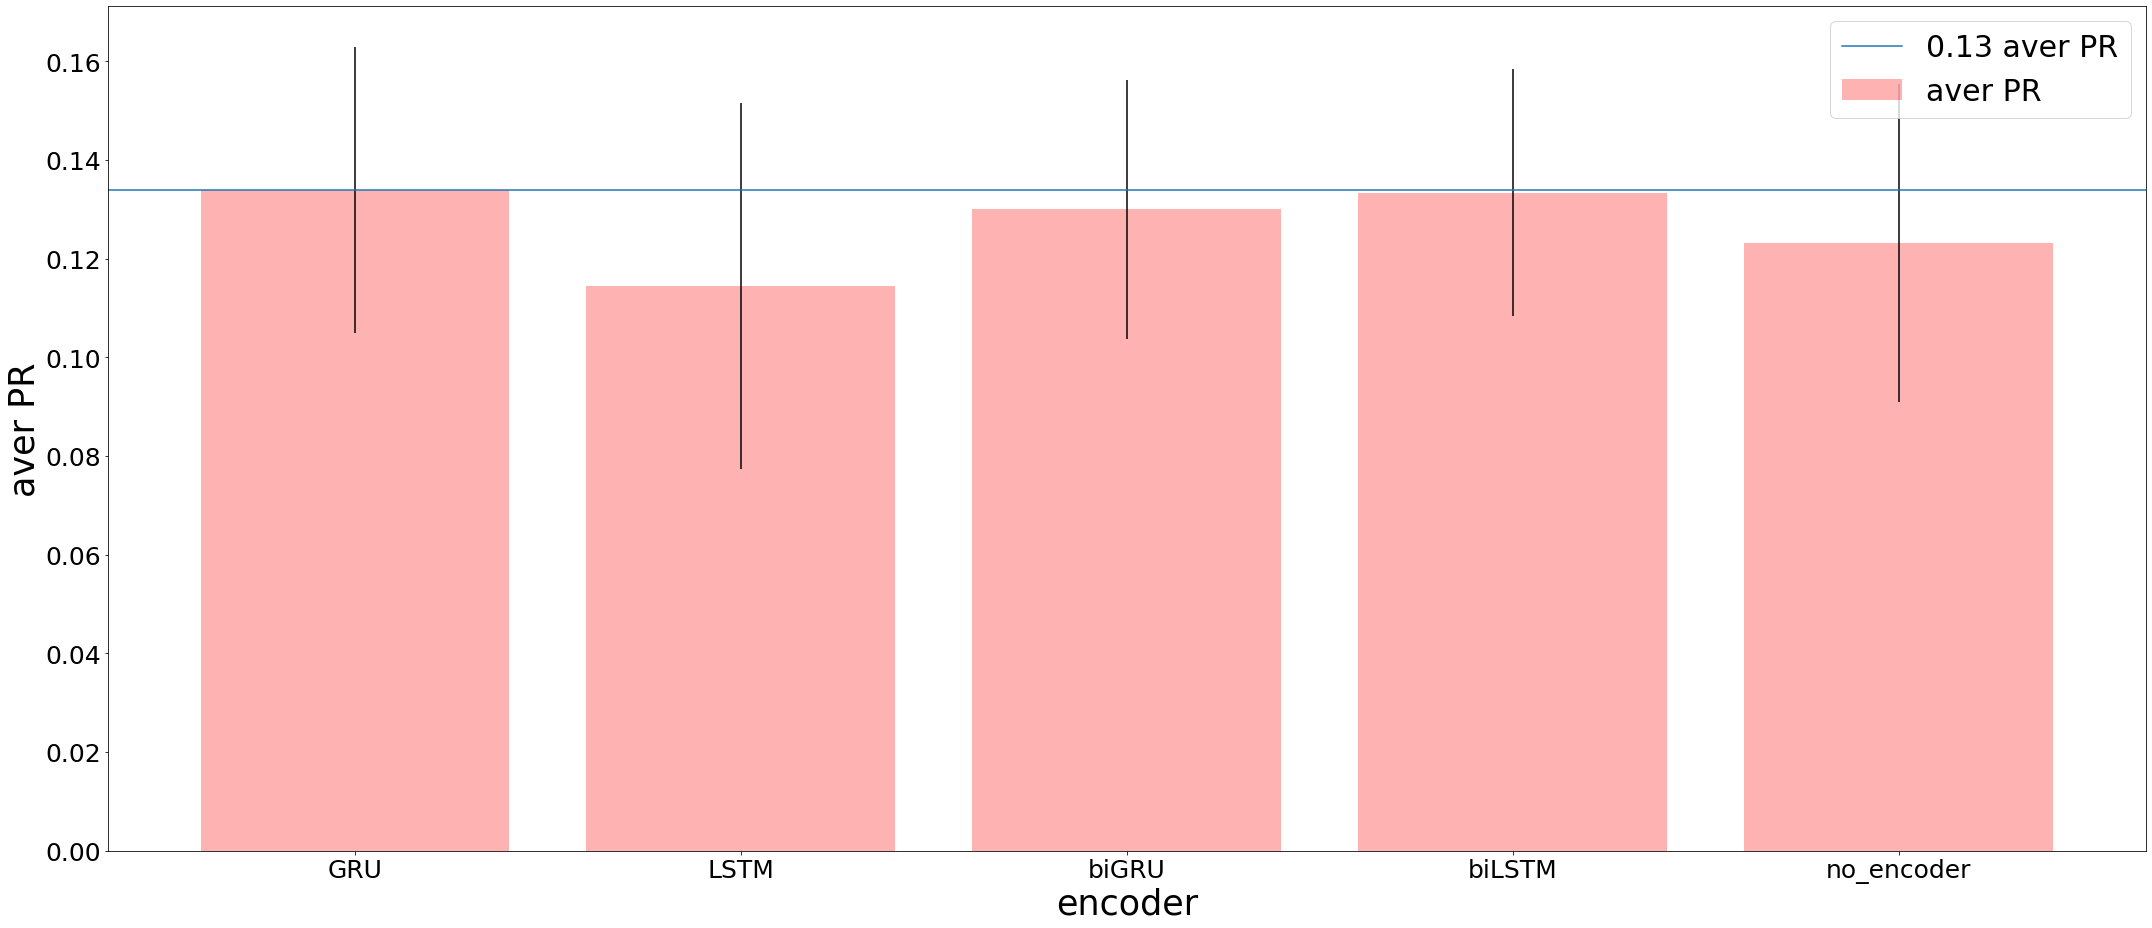

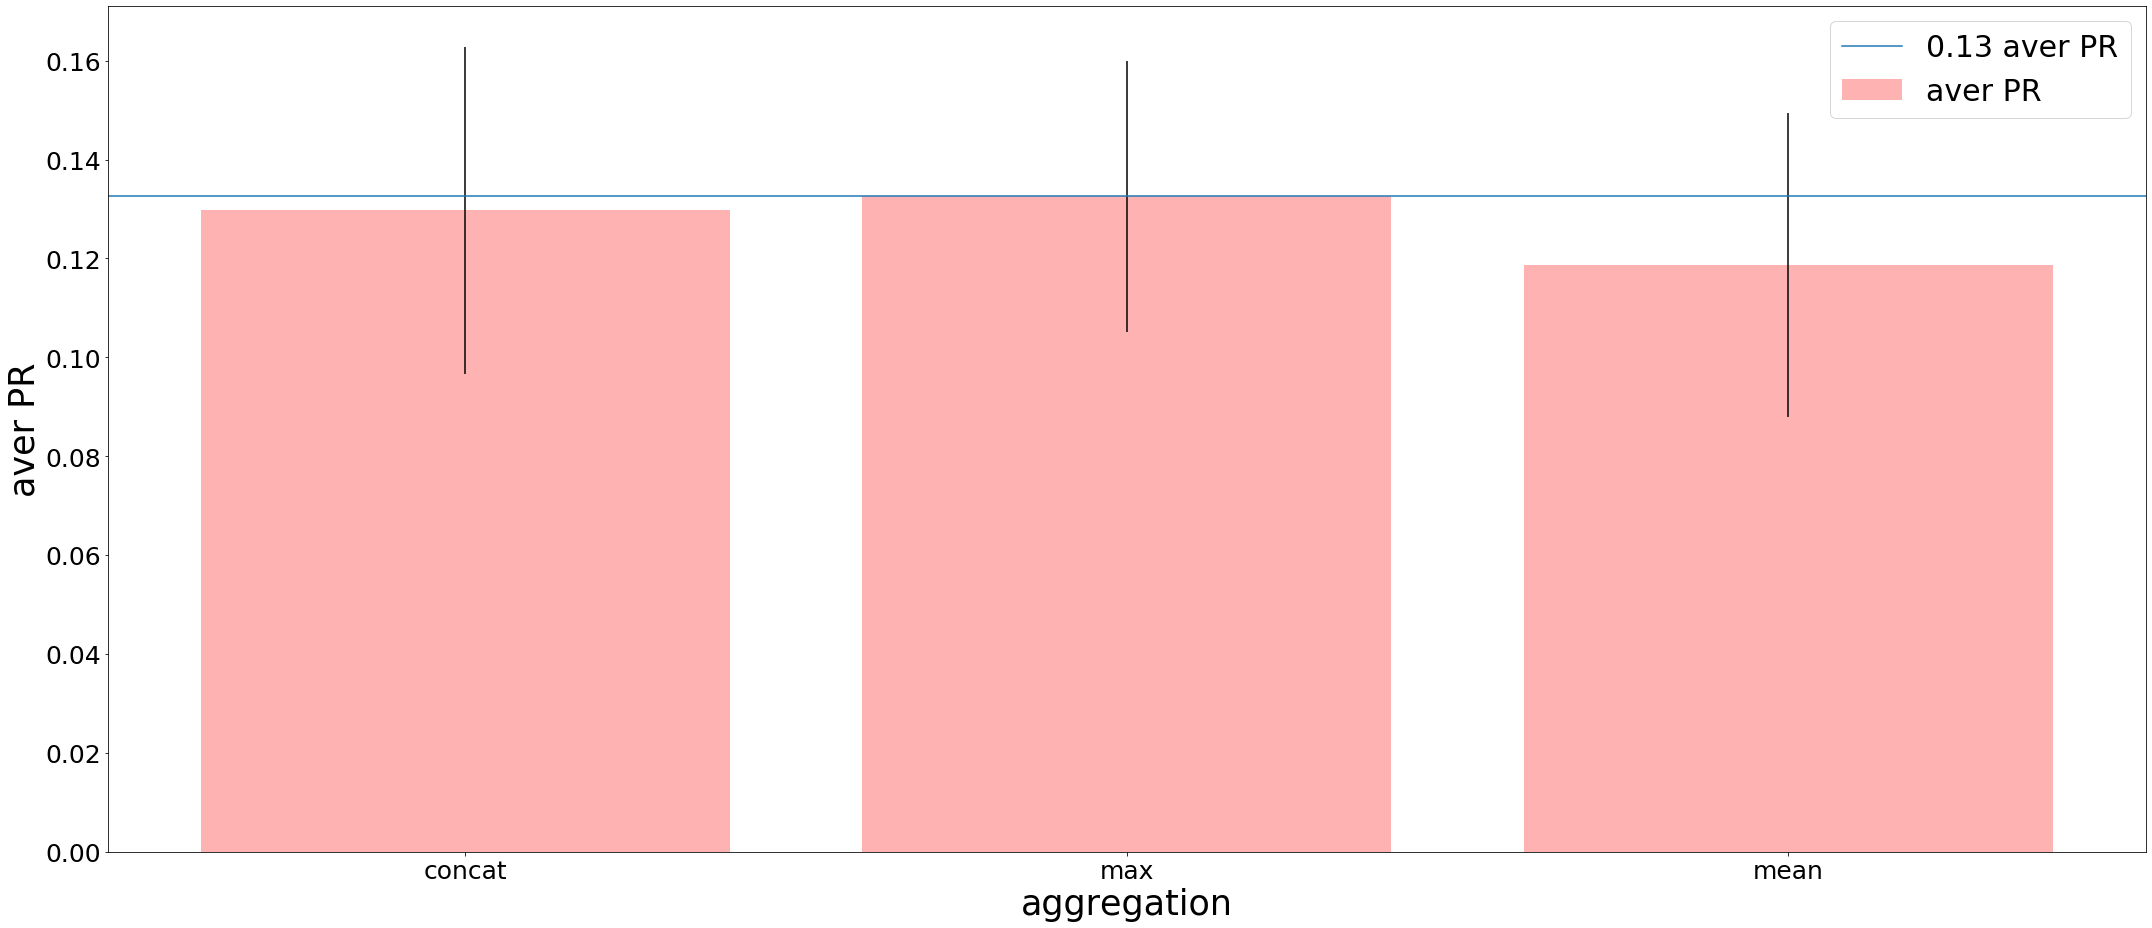

In [6]:
scores = aver_prs
name = 'aver PR'

for k in ['features', 'encoder', 'aggregation']:
    mrrs = np.array([a[0] for a in scores])

    hyperparams = np.array([a[1][k] for a in scores])

    unique_values = np.unique(hyperparams)

    curr_scores_mean = []
    curr_scores_std = []

    for val in unique_values:
        cur_vals = mrrs[hyperparams == val]
        mean_value = np.mean(cur_vals)
        std = np.std(cur_vals)

        curr_scores_mean.append(mean_value)
        curr_scores_std.append(std)
    max_val = max(curr_scores_mean)
    
    fig, ax = plt.subplots(figsize=(30, 13))

    rects1 = ax.bar([str(i) for i in unique_values],
                    curr_scores_mean,
                    alpha=0.3,
                    yerr=curr_scores_std,
                    color='red',
                    label=name)


    ax.axhline(y=max_val, label=f'{max_val:.2f} {name}', alpha=1)

    ax.set_xlabel(k, size=35)
    ax.set_ylabel(name, size=35)
    ax.set_xticklabels([str(i) for i in unique_values])
    ax.legend(prop={'size': 30})
    ax.tick_params(labelsize=25)

    fig.tight_layout()
    plt.show()